# Project 2020 - Fundamentals of Data Analysis
This project performs and explains simple linear regression using the Python programming language. Using the *powerproduction* dataset, it sets out to accurately predict wind turbine power output from wind speed values


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
pp = pd.read_csv("powerproduction.csv")
pp.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


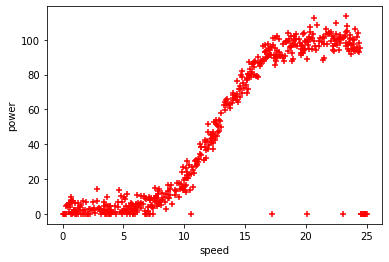

In [30]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp.speed,pp.power,color='red',marker='+')

In [32]:
new_df = pp.drop('power',axis='columns')
new_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [54]:
type(new_df)

pandas.core.frame.DataFrame

In [34]:
power = pp.power
power

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

In [37]:
reg = LinearRegression()
reg.fit(new_df, power)

LinearRegression()

In [55]:
reg.predict([[9.746]])

array([34.02698472])

In [56]:
reg.coef_

array([4.91759567])

In [57]:
reg.intercept_

-13.899902630519641

In [58]:
4.91759567*9.746 -13.899902630519641

34.02698476930036

In [76]:
rng = np.random.default_rng()

In [132]:
speed_list = 25 * rng.random(10) - 0

In [136]:
speed_arr = speed_list.reshape(-1, 1)
speed_arr

array([[23.68228958],
       [13.49629911],
       [18.25673885],
       [15.5081042 ],
       [19.36756303],
       [ 6.0346622 ],
       [ 2.48775027],
       [ 7.39308875],
       [ 7.33122921],
       [15.46840688]])

In [134]:
#speed_arr = speed_list.reshape(1, -1)

In [135]:
p = reg.predict(speed_arr)
p

array([102.56002195,  52.46943935,  75.8793572 ,  62.36268336,
        81.34194137,  15.77612605,  -1.66615268,  22.45631856,
        22.15211837,  62.167468  ])

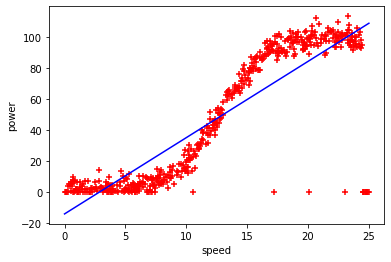

In [139]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp.speed,pp.power,color='red',marker='+')
plt.plot(pp.speed,reg.predict(pp[['speed']]),color='blue')

In [140]:
X = pp.iloc[:, :-1].values
Y = pp.iloc[:, 1].values

In [168]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [169]:
reg.fit(X_Train, Y_Train)

LinearRegression()

In [170]:
df_ytrain = pd.DataFrame(Y_Train)

In [171]:
df_xtrain = pd.DataFrame(X_Train)

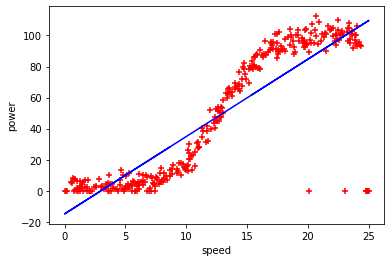

In [172]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(df_xtrain,df_ytrain,color='red',marker='+')
plt.plot(df_xtrain,reg.predict(df_xtrain),color='blue')

In [164]:
df_xtrain.describe()

,0
count,62.000000
mean,12.479435
std,7.127957
min,0.526000
25%,7.426000
50%,12.312000
75%,17.811500
max,24.299000


In [154]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [144]:
pp[['speed']]

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [61]:
x = pp["speed"]
y = pp["power"]

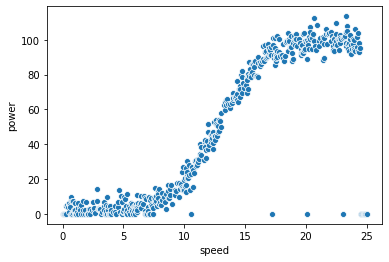

In [62]:
sns.scatterplot(x, y)

In [9]:
from scipy.stats import pearsonr 

In [10]:
corr, _ = pearsonr(pp["speed"], pp["power"]) 
print('Pearsons correlation: %f' % corr) 

Pearsons correlation: 0.853778


In [40]:
model = LinearRegression()

In [41]:
arr = pp.to_numpy()

In [42]:
#print(arr[:,0])

In [63]:
x = arr[:,0]

In [64]:
y = arr[:,1]

In [65]:
x = x.reshape(-1, 1)

In [66]:
x[:10]

array([[0.   ],
       [0.125],
       [0.15 ],
       [0.225],
       [0.275],
       [0.325],
       [0.4  ],
       [0.45 ],
       [0.501],
       [0.526]])

In [67]:
x[-10:]

array([[24.499],
       [24.525],
       [24.575],
       [24.65 ],
       [24.75 ],
       [24.775],
       [24.85 ],
       [24.875],
       [24.95 ],
       [25.   ]])

In [68]:
model.fit(x, y)

LinearRegression()

In [69]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7289360258564072


In [70]:
print('intercept:', model.intercept_)

intercept: -13.899902630519641


In [71]:
print('slope:', model.coef_)

slope: [4.91759567]


In [72]:
m = model.coef_

In [73]:
model.predict([[9.746]])

array([34.02698472])